<div dir=rtl>
    
## מעבדה לפיסיקה 2
# אלקטרון בשדות
<div dir=rtl>
תיעוד ניסוי "אלקטרון בשדות"<br>

<div dir=rtl>
<font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.2
***
<div dir=rtl>
תאריך:
<div dir=rtl>  
עמדה:
<div dir=rtl>
מבצעים/ות:



***
<div dir=rtl> <b> הערות: </b> <br>
.
.
.
.
    


<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [301]:
import math

import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.stats import linregress  # linear regression
import scipy.constants as spc  #Scientific constants

<div dir=rtl>
<h1>
    מהלך הניסוי 
<a id="hathala"></a>
</h1>

<div dir=rtl>
<h3>
    בדיקת איפוס 
</h3>
בדקו אם האלומה מאופסת בהעדר שדות (במרחק של פחות מ1-ממ מהציר האופקי). אם לא, יש ליישם תיקון איפוס (ראו משוואה (14)).

<div dir=rtl>
הסבר: </br>
.
.
.

In [302]:
# If need be, create a function for the correction here and apply to the data later
# Zero correction function:


<div dir=rtl>
<h3>
    ניסוי שדה מגנטי (B experiment) 
</h3>
<div dir=rtl>
בחרו זוגות של מתח האצה ($U_A$) , זרם ($I$) ונקודה לאורך המסלול  של אלומת האלקטרונים (ראו משוואה (4) בשביל חילוץ הרדיוס) בשביל להעריך את יחס מסה-מטען של האלקטרון מתוך משוואה (6). </br>
לא לשכוח הערכת שגיאה לכל מדידה בשביל הממוצע הממושקל וקווי השגיאה!

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> נוח לבחור נקודת חיתוך של קווי הרשת בשביל המדידה 
</div>

In [303]:
# B measurements:
accleration_voltages = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4.8, 4, 2.6, 1.5, 1.3, 2, 3.4, 3.1, 3.6, 3.9]) * 1000
accleration_voltages_err = np.maximum(0.03 * accleration_voltages, np.array([50] * len(accleration_voltages)))
current = np.array(
    [.252, .160, .096, .2, .264, .304, .539, .697, .798, .399, -.3, -.3, -.3, -.3, -.3, -.35, -.35, -.35, -.35, -.38, ])
current_err = (0.005 * current + 0.005)
b_grid_x = np.array([9, 8, 8, 7, 6, 7, 5, 5, 4, 7, 6, 7, 5, 6, 5, 6, 5, 6, 4, 5]) / 100
b_grid_err = 0.2 / 100
b_grid_y = np.array([2, 1, .5, 1, 1, 1.5, 1.5, 2, 1.5, 2, -1, -1.5, -1, -2, -1.5, -2, -1, -1.5, -.5, -1]) / 100

radius = (b_grid_x ** 2 + b_grid_y ** 2) / (2 * b_grid_y)
k2 = (.716 * 1.255e-6) * 320 / (6.7 / 100)
em = 2 * accleration_voltages / (radius * k2 * current) ** 2
em

array([1.89329027e+11, 2.00784168e+11, 1.42707705e+11, 2.17168156e+11,
       2.27606595e+11, 2.01299991e+11, 2.26499954e+11, 2.12615334e+11,
       2.30381256e+11, 1.94248916e+11, 1.69208205e+11, 1.65363022e+11,
       1.85613809e+11, 1.80973463e+11, 1.90097536e+11, 1.77280127e+11,
       1.78329122e+11, 1.69032955e+11, 1.20844205e+11, 1.73530915e+11])

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ערך היחס מסה-מטען של האלקטרון קרוב לספרותי?
</div>

Correlation coefficient (r): 0.9871
R-squared: 0.9743


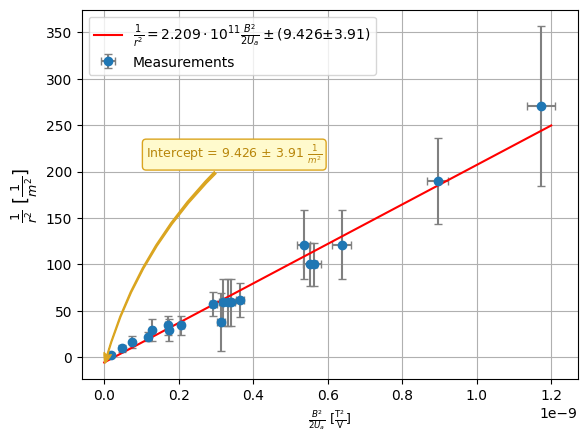

np.float64(0.9743119667699773)

In [304]:
magnetic_field = k2 * current
x = (magnetic_field**2) / (2*accleration_voltages)
y = 1/(radius**2)
# Relative errors for current and acceleration voltage in x = B/(2U) = k2 * I / (2U)
rel_err_current = current_err / np.abs(current)
rel_err_acc_voltage = accleration_voltages_err / accleration_voltages

# Total relative error for x using hypot (Pythagorean sum)
rel_err_x = np.hypot(rel_err_current, rel_err_acc_voltage)
x_err = np.abs(x * rel_err_x)  # absolute error in x
radius_err = np.sqrt(
    ((2 * b_grid_x / (2 * b_grid_y)) * b_grid_err) ** 2 +
    (((-b_grid_x**2 - b_grid_y**2) / (2 * b_grid_y**2)) * b_grid_err) ** 2
)

# For y = 1 / r^2, relative error is 2 * (radius_err / radius)
rel_err_radius = radius_err / radius
rel_err_y = 2 * rel_err_radius
y = radius ** -2
y_err = np.abs(y * rel_err_y)  # absolute error in y

# Perform linear regression
result = linregress(x, y)
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr  # <-- here it is!

# Helper to format scientific notation safely
def sci_notation_parts(num):
    s = f"{num:.3e}"
    if 'e' in s:
        base, exp = s.split('e')
        return base, int(exp)
    else:
        return s, 0

base_i, exp_i = sci_notation_parts(intercept)
base_err, exp_err = sci_notation_parts(intercept_err)

intercept_str = (
    rf"{base_i} \cdot 10^{{{exp_i}}} \pm {base_err} \cdot 10^{{{exp_err}}}"
)

plt.grid()
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='gray', capsize=3, label='Measurements')

# plt.plot(
#     np.linspace(0, 1.2e-9, 100),
#     slope * np.linspace(np.min(x), np.max(x), 100) + intercept,
#     'r-', label='Linear fit'
# )
def sci_notation(num):
    s = f"{num:.3e}"
    base, exp = s.split('e')
    return rf"{base} \cdot 10^{{{int(exp)}}}"

slope_str = sci_notation(slope)
intercept_str = sci_notation(intercept)
equation_label = rf"$\frac{{1}}{{r^2}} = {slope_str} \frac{{B^2}}{{2U_a}} \pm (9.426±3.91)$"

plt.plot(
    np.linspace(0, 1.2e-9, 100),
    slope * np.linspace(np.min(x), np.max(x), 100) + intercept,
    'r-', label=equation_label
)
plt.annotate(
    r'Intercept = 9.426 ± 3.91 $\frac{1}{m^2}$',
    xy=(0, intercept),
    xytext=(0.13, 0.6),
    textcoords="axes fraction",
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=5
)

plt.xlabel(r'$\frac{B^2}{2U_a}\ [\frac{\mathrm{T}^2}{\mathrm{V}}]$', fontsize=9)
plt.ylabel(r'$\frac{1}{r^2}\ [\frac{1}{m^2}]$', fontsize=13)
plt.legend()
# plt.xlim(left=0, right=1.2e-9)
print(f"Correlation coefficient (r): {result.rvalue:.4f}")
print(f"R-squared: {result.rvalue**2:.4f}")
plt.savefig("b.svg", format="svg")
plt.show()
result.rvalue**2

In [305]:
import numpy as np


# Given data
accleration_voltages = -np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4.8, 4, 2.6, 1.5, 1.3, 2, 3.4, 3.1, 3.6, 3.9]) * 1000
accleration_voltages_err = np.maximum(0.03 * accleration_voltages, 50)

current = np.array([.252, .160, .096, .2, .264, .304, .539, .697, .798, .399,
                    -.3, -.3, -.3, -.3, -.3, -.35, -.35, -.35, -.35, -.38])
current_err = 0.005 * np.abs(current) + 0.005

b_grid_x = np.array([9, 8, 8, 7, 6, 7, 5, 5, 4, 7, 6, 7, 5, 6, 5, 6, 5, 6, 4, 5]) / 100
b_grid_y = np.array([2, 1, .5, 1, 1, 1.5, 1.5, 2, 1.5, 2, -1, -1.5, -1, -2, -1.5, -2, -1, -1.5, -.5, -1]) / 100
b_grid_err = 0.2 / 100

# Calculate radius and its uncertainty
radius = (b_grid_x ** 2 + b_grid_y ** 2) / (2 * b_grid_y)
# error propagation for r = (x² + y²) / (2y)
radius_err = np.sqrt(
    ((2 * b_grid_x / (2 * b_grid_y)) * b_grid_err) ** 2 +
    (((-b_grid_x ** 2 - b_grid_y ** 2) / (2 * b_grid_y ** 2)) * b_grid_err) ** 2
)

# Constants
k2 = (.716 * 1.255e-6) * 320 / (6.7 / 100)

# Calculate em and its error
em = 2 * accleration_voltages / (radius * k2 * current) ** 2

# Use error propagation for em = 2A / (k2 * r * I)^2
dA = 2 / (k2 ** 2 * radius ** 2 * current ** 2)
dR = -4 * accleration_voltages / (k2 ** 2 * radius ** 3 * current ** 2)
dI = -4 * accleration_voltages / (k2 ** 2 * radius ** 2 * current ** 3)

em_err = np.sqrt(
    (dA * accleration_voltages_err) ** 2 +
    (dR * radius_err) ** 2 +
    (dI * current_err) ** 2
)

em, em_err
weights = em_err ** -2
final = np.sum(em * weights) / np.sum(weights)
final_sem = 1/np.sqrt(np.sum(weights))
print(f"{final:.4e} ± {final_sem:.4e}")
print(f"{((final - (-1.7588e11)) / (-1.7588e11)) * 100:.4}%")


-1.8755e+11 ± 1.3397e+10
6.636%


<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה מקור השגיאה העיקרי בחלק זה? כיצד אפשר לשפר את התוצאה?
</div>

<div dir=rtl>
<h3>
    ניסוי ווין (Wien experiment) 
</h3>
<div dir=rtl>
בחרו שלשות של מתח האצה ($U_A$) , זרם ($I$) ומתח הסחה ($U_P$) בשביל לקבל אלומה קרובה ככל האפשר לציר האופקי - בשביל להעריך את יחס מסה-מטען של האלקטרון מתוך משוואה (13). </br>
לא לשכוח הערכת שגיאה לכל מדידה בשביל הממוצע הממושקל!

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> נוח לקבע את אחד המשתנים ולשנות את השאר, ואז להחליף ביניהם. 
</div>

In [306]:
# Wien measurements:
wien_acceleration_voltage = np.array([2.1, 4.3, 3.9, 4, 5, 5, 3, 5, 5, 4.4]) * 1000
wien_deflection_voltage = np.array([.4, 1.7, 2, 2, 2.5, 3, 2.5, 3.5, .5, 1.7]) * 1000
wien_current = np.array([.046, .159, .195, .207, .229, .258, .293, .329, .028, .143])
# In higher acceleration voltages, the beam was more linear
k1 = .75
d = 5.5 / 100
1 / (2 * wien_acceleration_voltage) * ((k1 * wien_deflection_voltage) / (k2 * wien_current * d)) ** 2

array([1.81755821e+11, 1.34195652e+11, 1.36153706e+11, 1.17804699e+11,
       1.20321255e+11, 1.36501178e+11, 1.22497387e+11, 1.14255626e+11,
       3.21926884e+11, 1.62134858e+11])

In [307]:
# Given data
wien_acceleration_voltage = np.array([2.1, 4.3, 3.9, 4, 5, 5, 3, 5, 5, 4.4]) * 1000
wien_deflection_voltage = np.array([.4, 1.7, 2, 2, 2.5, 3, 2.5, 3.5, .5, 1.7]) * 1000
wien_current = np.array([.046, .159, .195, .207, .229, .258, .293, .329, .028, .143])

# Constants
k1 = 0.75
d = 5.5 / 100  # meters
k2 = (.716 * 1.255e-6) * 320 / (6.7 / 100)

# Uncertainties
wien_acceleration_voltage_err = np.maximum(0.03 * wien_acceleration_voltage, 50)
wien_deflection_voltage_err = np.maximum(0.03 * wien_deflection_voltage, 50)
wien_current_err = 0.005 * np.abs(wien_current) + 0.005

# Compute A and D
A = (k1 * wien_deflection_voltage) / (k2 * wien_current * d)
D = A**2 / (2 * wien_acceleration_voltage)

# Partial derivatives
dD_dU = -A**2 / (2 * wien_acceleration_voltage**2)
dD_dV = (2 * A / (2 * wien_acceleration_voltage)) * (k1 / (k2 * wien_current * d))
dD_dI = -(2 * A / (2 * wien_acceleration_voltage)) * (k1 * wien_deflection_voltage / (k2 * wien_current**2 * d))

# Error propagation
D_err = np.sqrt(
    (dD_dU * wien_acceleration_voltage_err) ** 2 +
    (dD_dV * wien_deflection_voltage_err) ** 2 +
    (dD_dI * wien_current_err) ** 2
)

D, D_err
# D = np.delete(D, 8)
# D_err = np.delete(D_err, 8)
weights = D_err ** -2
final = abs(np.sum(D * weights) / np.sum(weights))
final_sem = 1/np.sqrt(np.sum(weights))
print(f"{final:.4e} ± {final_sem:.4e}")
print(f"{((final - 1.7588e11) / 1.7588e11) * 100:.5}%")
D_err

1.2655e+11 ± 3.9188e+09
-28.05%


array([6.16650133e+10, 1.32937719e+10, 1.23708884e+10, 1.04706844e+10,
       1.03366164e+10, 1.13201434e+10, 9.83603663e+09, 8.94685539e+09,
       1.34938401e+11, 1.69186898e+10])

[חזרה לתחילת מהלך הניסוי](#hathala)

Correlation coefficient (r): 0.8267
R-squared: 0.6835


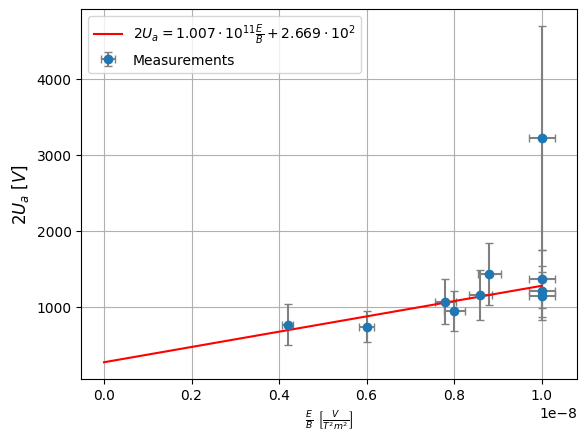

In [318]:
# Constants (example, replace with your actual values)
k1 = 0.75
k1_err = 0.10  # absolute error in k1
k2 = (.716 * 1.255e-6) * 320 / (6.7 / 100)  # your k2 value
d = 5.5 / 100  # distance in meters
remove_idx = 0  # 9th measurement index

# wien_acceleration_voltage = np.delete(wien_acceleration_voltage, remove_idx)
# wien_deflection_voltage = np.delete(wien_deflection_voltage, remove_idx)
# wien_current = np.delete(wien_current, remove_idx)
# wien_deflection_voltage_err = np.delete(wien_deflection_voltage_err, remove_idx)
# wien_current_err = np.delete(wien_current_err, remove_idx)

# Example deflection voltage error (adjust if you have better data)
wien_deflection_voltage_err = 0.03 * wien_deflection_voltage  # 3% error assumption

# Example current error model
wien_current_err = 0.005 * np.abs(wien_current) + 0.005

# Calculate A
A = (k1 * wien_deflection_voltage) / (k2 * wien_current * d)

# Calculate relative errors for A
rel_err_k1 = k1_err / k1
rel_err_deflection_voltage = wien_deflection_voltage_err / wien_deflection_voltage
rel_err_current = wien_current_err / np.abs(wien_current)

rel_err_A = np.hypot(rel_err_k1, np.hypot(rel_err_deflection_voltage, rel_err_current))
A_err = np.abs(A * rel_err_A)

# x and y for regression
x = 2 * wien_acceleration_voltage * 1e-12
x_err = np.abs(np.maximum(0.03 * x, np.array([50 * 1e-12] * len(x)))) #* 1e-9

y = A ** 2 * 1e-12
rel_err_y = 2 * (A_err / np.abs(A)) #* 1e-9
y_err = np.abs(y * rel_err_y)

# Linear regression
new_x = np.delete(x, 8)
new_y = np.delete(y, 8)
result = linregress(new_x, new_y)
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

def sci_notation(num):
    s = f"{num:.3e}"
    base, exp = s.split('e')
    return rf"{base} \cdot 10^{{{int(exp)}}}"

slope_str = sci_notation(slope)
intercept_str = sci_notation(intercept)
equation_label = rf"$2 U_a = {slope_str} \frac{{E}}{{B}} + {intercept_str}$"

# Plotting
plt.grid()
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='gray', capsize=3, label='Measurements')

x_fit = np.linspace(0, np.max(x), 100)
plt.plot(x_fit, slope * x_fit + intercept, 'r-', label=equation_label)

plt.xlabel(r'$\frac{E}{B} \ \left[\frac{V}{T^2m^2}\right]$', fontsize=9.5)
plt.ylabel(r'$2 U_a\ [V]$', fontsize=12)
plt.legend()
# plt.xlim(left=0, right=1.2 * max(x))

print(f"Correlation coefficient (r): {result.rvalue:.4f}")
print(f"R-squared: {result.rvalue**2:.4f}")

plt.savefig("w.svg", format="svg")
plt.show()

<div dir=rtl>
<h3>
    דיון דיווח ומסקנות
</h3>

<div dir=rtl>
<h3>
    מדידות נוספות 
</h3>
- האם תוכלו לחלץ את ערכו של 
    $k_1$ 
    בעצמכם? (ראו משוואה (10)) 

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>